In [42]:
import get_processed_data as gpd
import scipy.stats as stats
import pandas as pd
import numpy as np
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt


# Malte

## Calculate means

In [43]:
# Load data
malte_easy = gpd.get_processed_data('malte', ["3", "4"])
malte_hard = gpd.get_processed_data('malte', ["6", "6+"])


Calculate means for acceleration X,Y,Z and rotation X,Y,Z independently

In [44]:
# Acceleration X, Y, Z mean
malte_easy_acc_x_mean = [sample["FreeAcc_X"].mean() for sample in malte_easy]
malte_easy_acc_y_mean = [sample["FreeAcc_Y"].mean() for sample in malte_easy]
malte_easy_acc_z_mean = [sample["FreeAcc_Z"].mean() for sample in malte_easy]

malte_hard_acc_x_mean = [sample["FreeAcc_X"].mean() for sample in malte_hard]
malte_hard_acc_y_mean = [sample["FreeAcc_Y"].mean() for sample in malte_hard]
malte_hard_acc_z_mean = [sample["FreeAcc_Z"].mean() for sample in malte_hard]

# Rotation X, Y, Z mean
malte_easy_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in malte_easy]

malte_easy_rot_x_mean = [np.mean([x.as_euler("xyz")[0] for x in sample]) for sample in malte_easy_rot]
malte_easy_rot_y_mean = [np.mean([x.as_euler("xyz")[1] for x in sample]) for sample in malte_easy_rot]
malte_easy_rot_z_mean = [np.mean([x.as_euler("xyz")[2] for x in sample]) for sample in malte_easy_rot]

malte_hard_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in malte_hard]

malte_hard_rot_x_mean = [np.mean([x.as_euler("xyz")[0] for x in sample]) for sample in malte_hard_rot]
malte_hard_rot_y_mean = [np.mean([x.as_euler("xyz")[1] for x in sample]) for sample in malte_hard_rot]
malte_hard_rot_z_mean = [np.mean([x.as_euler("xyz")[2] for x in sample]) for sample in malte_hard_rot]

Calculate acceleration magnitude means

In [45]:
# Calculate acceleration magnitudes
malte_easy_acc_mag = [(sample["FreeAcc_X"]**2 + sample["FreeAcc_Y"]**2 + sample["FreeAcc_Z"]**2)**0.5 for sample in malte_easy]
malte_hard_acc_mag = [(sample["FreeAcc_X"]**2 + sample["FreeAcc_Y"]**2 + sample["FreeAcc_Z"]**2)**0.5 for sample in malte_hard]

# Calculate acceleration magnitude means
malte_easy_acc_mag_means = [x.mean() for x in malte_easy_acc_mag]
malte_hard_acc_mag_means = [x.mean() for x in malte_hard_acc_mag]

Calculate angular velocity means

In [46]:
# Get rotation matrices
malte_easy_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in malte_easy]
malte_hard_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in malte_hard]

# Calculate rotation differences for each sample
malte_easy_rot_diff = [[sample[i+1].inv() * sample[i] for i in range(len(sample)-1)] for sample in malte_easy_rot]
malte_hard_rot_diff = [[sample[i+1].inv() * sample[i] for i in range(len(sample)-1)] for sample in malte_hard_rot]

# Convert to rotation vectors
malte_easy_rot_diff_vec = [[x.as_rotvec() for x in sample] for sample in malte_easy_rot_diff]
malte_hard_rot_diff_vec = [[x.as_rotvec() for x in sample] for sample in malte_hard_rot_diff]

# Calculate magnitude of rotation vectors
malte_easy_rot_diff_vec_mag = [[np.linalg.norm(x) for x in sample] for sample in malte_easy_rot_diff_vec]
malte_hard_rot_diff_vec_mag = [[np.linalg.norm(x) for x in sample] for sample in malte_hard_rot_diff_vec]

# Calculate mean of rotation vector magnitudes
malte_easy_rot_diff_vec_mag_mean = [np.mean(x) for x in malte_easy_rot_diff_vec_mag]
malte_hard_rot_diff_vec_mag_mean = [np.mean(x) for x in malte_hard_rot_diff_vec_mag]


## Q-Q plots & Shapiro-Wilk test for normality with alpha = 0.05

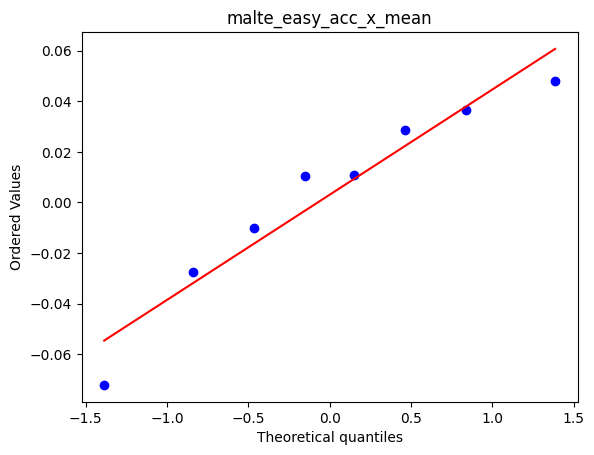

ShapiroResult(statistic=0.9322771982179825, pvalue=0.5370299531247665)
Is normally distributed:  True


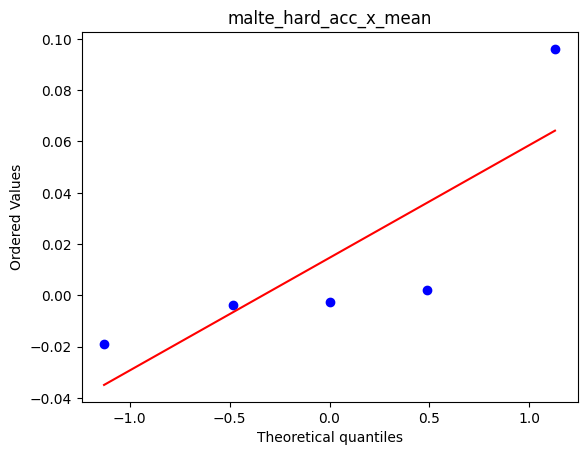

ShapiroResult(statistic=0.7091454345153599, pvalue=0.0119073157044544)
Is normally distributed:  False


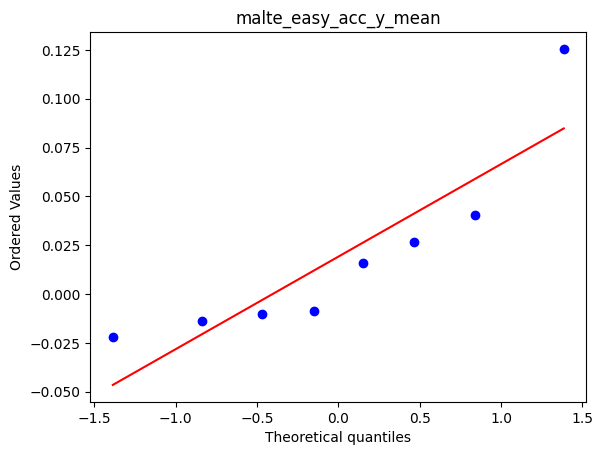

ShapiroResult(statistic=0.8039293074018476, pvalue=0.03153155900911267)
Is normally distributed:  False


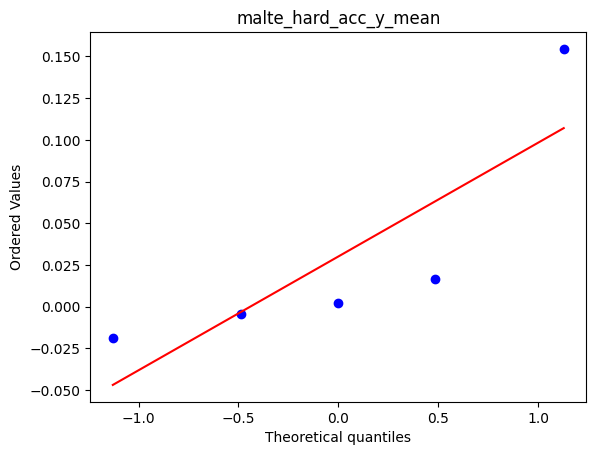

ShapiroResult(statistic=0.7233114563093161, pvalue=0.016530162441379403)
Is normally distributed:  False


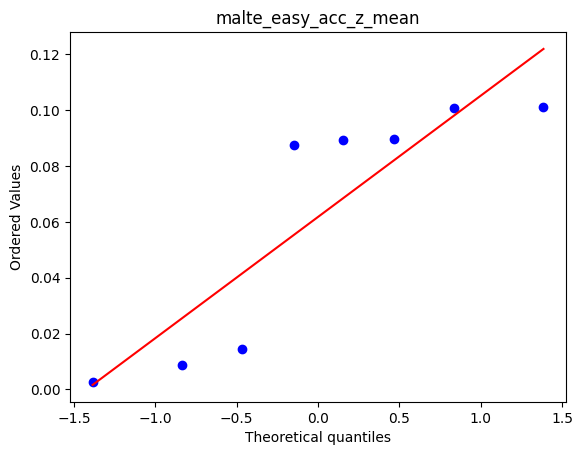

ShapiroResult(statistic=0.7519050153151439, pvalue=0.008574110687361308)
Is normally distributed:  False


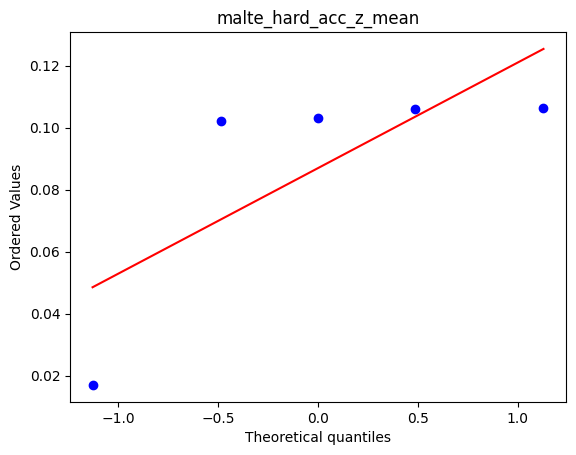

ShapiroResult(statistic=0.5949044056763799, pvalue=0.0005351909519392723)
Is normally distributed:  False


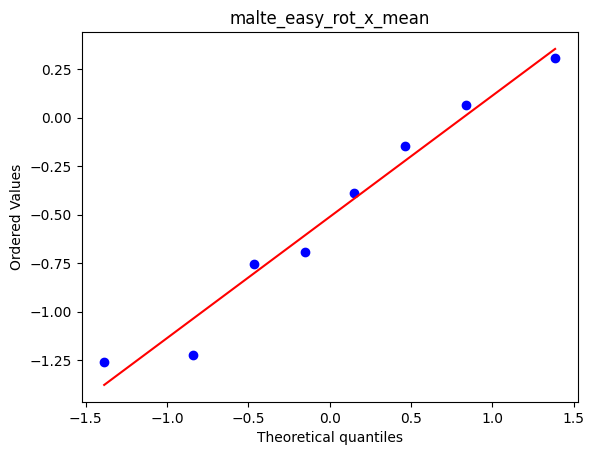

ShapiroResult(statistic=0.9482196786378575, pvalue=0.6932696401400467)
Is normally distributed:  True


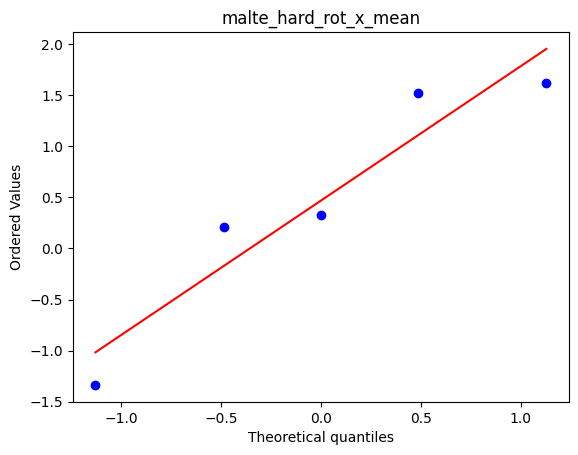

ShapiroResult(statistic=0.9011930434311602, pvalue=0.416514612572039)
Is normally distributed:  True


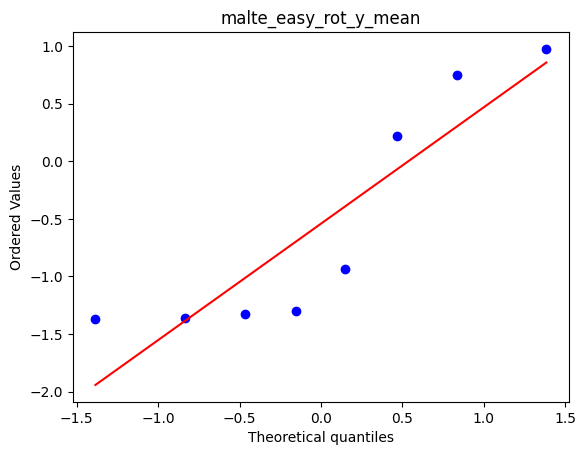

ShapiroResult(statistic=0.7795512096274527, pvalue=0.017225215393580035)
Is normally distributed:  False


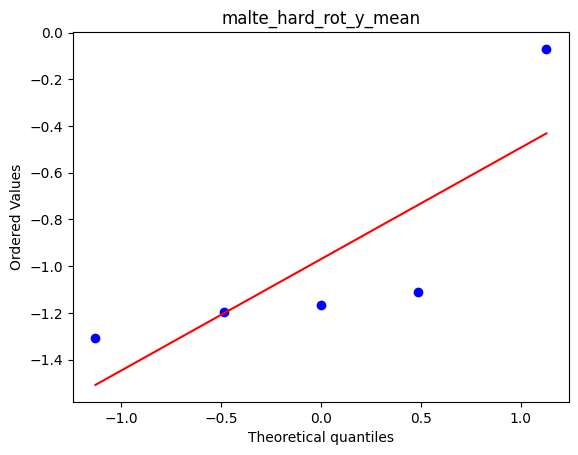

ShapiroResult(statistic=0.6895629619608494, pvalue=0.007424414877972478)
Is normally distributed:  False


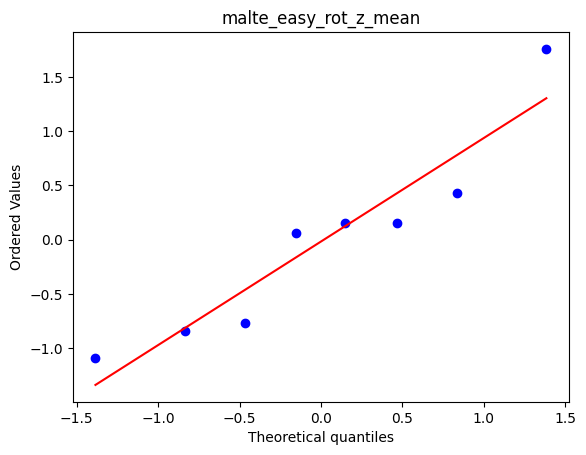

ShapiroResult(statistic=0.9052078410866641, pvalue=0.3215479330189395)
Is normally distributed:  True


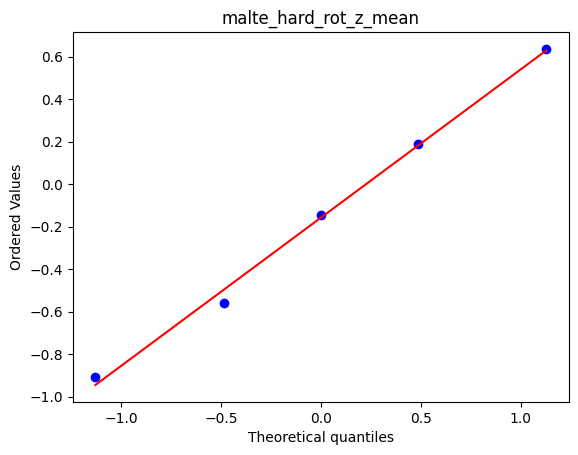

ShapiroResult(statistic=0.9874135654962763, pvalue=0.969873676658031)
Is normally distributed:  True


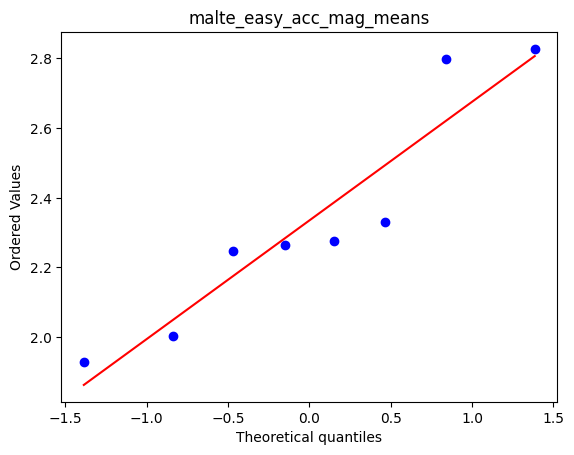

ShapiroResult(statistic=0.8779075671831889, pvalue=0.17983041481084142)
Is normally distributed:  True


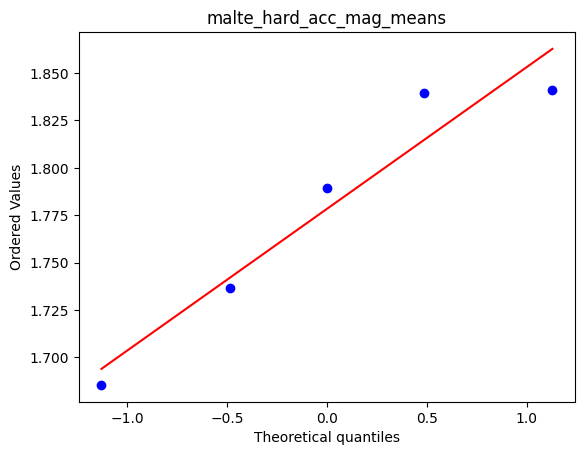

ShapiroResult(statistic=0.9061003779358956, pvalue=0.4445144680838223)
Is normally distributed:  True


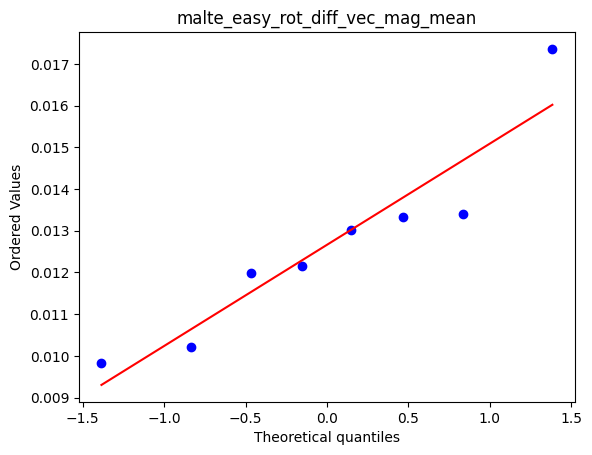

ShapiroResult(statistic=0.9033457331720397, pvalue=0.3095707686173167)
Is normally distributed:  True


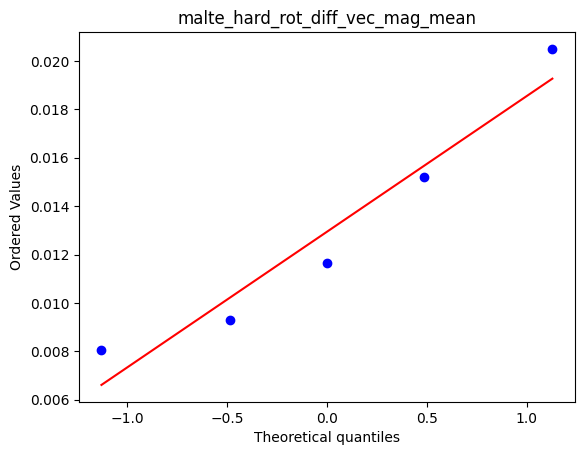

ShapiroResult(statistic=0.9311202504568379, pvalue=0.6040296524606015)
Is normally distributed:  True



Features are normally distributed:
malte_easy_acc_x_mean True
malte_hard_acc_x_mean False
malte_easy_acc_y_mean False
malte_hard_acc_y_mean False
malte_easy_acc_z_mean False
malte_hard_acc_z_mean False
malte_easy_rot_x_mean True
malte_hard_rot_x_mean True
malte_easy_rot_y_mean False
malte_hard_rot_y_mean False
malte_easy_rot_z_mean True
malte_hard_rot_z_mean True
malte_easy_acc_mag_means True
malte_hard_acc_mag_means True
malte_easy_rot_diff_vec_mag_mean True
malte_hard_rot_diff_vec_mag_mean True


In [53]:
alpha = 0.05
features = ["malte_easy_acc_x_mean", "malte_hard_acc_x_mean", "malte_easy_acc_y_mean", "malte_hard_acc_y_mean", "malte_easy_acc_z_mean", "malte_hard_acc_z_mean", "malte_easy_rot_x_mean", "malte_hard_rot_x_mean", "malte_easy_rot_y_mean", "malte_hard_rot_y_mean", "malte_easy_rot_z_mean", "malte_hard_rot_z_mean", "malte_easy_acc_mag_means", "malte_hard_acc_mag_means", "malte_easy_rot_diff_vec_mag_mean", "malte_hard_rot_diff_vec_mag_mean"]

features_normal_distributed = {}

for feature_name in features:
    feature = eval(feature_name)
    stats.probplot(feature, dist="norm", plot=plt)
    plt.title(feature_name)
    plt.show()

    shapiro_test = stats.shapiro(feature)
    print(shapiro_test)
    print("Is normally distributed: ", shapiro_test[1] > alpha)

    features_normal_distributed[feature_name] = shapiro_test[1] > alpha

print("\n\n")
print("Features are normally distributed:")
for key, value in features_normal_distributed.items():
    print(key, value)

In [54]:
# For features that are normally distributed, we can use a t-test. For features that are not normally distributed, we can use a Mann-Whitney U test.

# Acceleration X, Y, Z mean – Mann-Whitney U test

acc_x_mean_test = stats.mannwhitneyu(malte_easy_acc_x_mean, malte_hard_acc_x_mean)
acc_y_mean_test = stats.mannwhitneyu(malte_easy_acc_y_mean, malte_hard_acc_y_mean)
acc_z_mean_test = stats.mannwhitneyu(malte_easy_acc_z_mean, malte_hard_acc_z_mean)

print("Acceleration X mean test: ", acc_x_mean_test)
print("Acceleration Y mean test: ", acc_y_mean_test)
print("Acceleration Z mean test: ", acc_z_mean_test)

# Rotation X, Z mean – t-test; Rotation Y mean – Mann-Whitney U test

rot_x_mean_test = stats.ttest_ind(malte_easy_rot_x_mean, malte_hard_rot_x_mean)
rot_y_mean_test = stats.mannwhitneyu(malte_easy_rot_y_mean, malte_hard_rot_y_mean)
rot_z_mean_test = stats.ttest_ind(malte_easy_rot_z_mean, malte_hard_rot_z_mean)

print("Rotation X mean test: ", rot_x_mean_test)
print("Rotation Y mean test: ", rot_y_mean_test)
print("Rotation Z mean test: ", rot_z_mean_test)

# Acceleration magnitude mean – t-test

acc_mag_mean_test = stats.ttest_ind(malte_easy_acc_mag_means, malte_hard_acc_mag_means)
print("Acceleration magnitude mean test: ", acc_mag_mean_test)

# Rotation vector magnitude mean – t-test

rot_diff_vec_mag_mean_test = stats.ttest_ind(malte_easy_rot_diff_vec_mag_mean, malte_hard_rot_diff_vec_mag_mean)
print("Rotation vector magnitude mean test: ", rot_diff_vec_mag_mean_test)

Acceleration X mean test:  MannwhitneyuResult(statistic=21.0, pvalue=0.9432789432789432)
Acceleration Y mean test:  MannwhitneyuResult(statistic=18.0, pvalue=0.8329448329448329)
Acceleration Z mean test:  MannwhitneyuResult(statistic=5.0, pvalue=0.029526029526029528)
Rotation X mean test:  TtestResult(statistic=-2.005635086020359, pvalue=0.0701234441621112, df=11.0)
Rotation Y mean test:  MannwhitneyuResult(statistic=20.0, pvalue=1.0)
Rotation Z mean test:  TtestResult(statistic=0.3025906965958861, pvalue=0.7678468965424912, df=11.0)
Acceleration magnitude mean test:  TtestResult(statistic=3.7039621997071666, pvalue=0.003477524109400619, df=11.0)
Rotation vector magnitude mean test:  TtestResult(statistic=-0.13671366759346887, pvalue=0.8937272245244019, df=11.0)


# Luis

## Calculate means

In [48]:
# Load data
luis_easy = gpd.get_processed_data('luis', ["3", "4"])
luis_hard = gpd.get_processed_data('luis', ["5", "5-", "6", "6+"])


Calculate means for acceleration X,Y,Z and rotation X,Y,Z independently

In [49]:
# Acceleration X, Y, Z mean
luis_easy_acc_x_mean = [sample["FreeAcc_X"].mean() for sample in luis_easy]
luis_easy_acc_y_mean = [sample["FreeAcc_Y"].mean() for sample in luis_easy]
luis_easy_acc_z_mean = [sample["FreeAcc_Z"].mean() for sample in luis_easy]

luis_hard_acc_x_mean = [sample["FreeAcc_X"].mean() for sample in luis_hard]
luis_hard_acc_y_mean = [sample["FreeAcc_Y"].mean() for sample in luis_hard]
luis_hard_acc_z_mean = [sample["FreeAcc_Z"].mean() for sample in luis_hard]

# Rotation X, Y, Z mean
luis_easy_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in luis_easy]

luis_easy_rot_x_mean = [np.mean([x.as_euler("xyz")[0] for x in sample]) for sample in luis_easy_rot]
luis_easy_rot_y_mean = [np.mean([x.as_euler("xyz")[1] for x in sample]) for sample in luis_easy_rot]
luis_easy_rot_z_mean = [np.mean([x.as_euler("xyz")[2] for x in sample]) for sample in luis_easy_rot]

luis_hard_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in luis_hard]

luis_hard_rot_x_mean = [np.mean([x.as_euler("xyz")[0] for x in sample]) for sample in luis_hard_rot]
luis_hard_rot_y_mean = [np.mean([x.as_euler("xyz")[1] for x in sample]) for sample in luis_hard_rot]
luis_hard_rot_z_mean = [np.mean([x.as_euler("xyz")[2] for x in sample]) for sample in luis_hard_rot]

Calculate acceleration magnitude means

In [50]:
# Calculate acceleration magnitudes
luis_easy_acc_mag = [(sample["FreeAcc_X"]**2 + sample["FreeAcc_Y"]**2 + sample["FreeAcc_Z"]**2)**0.5 for sample in luis_easy]
luis_hard_acc_mag = [(sample["FreeAcc_X"]**2 + sample["FreeAcc_Y"]**2 + sample["FreeAcc_Z"]**2)**0.5 for sample in luis_hard]

# Calculate acceleration magnitude means
luis_easy_acc_mag_means = [x.mean() for x in luis_easy_acc_mag]
luis_hard_acc_mag_means = [x.mean() for x in luis_hard_acc_mag]

Calculate angular velocity means

In [51]:
# Get rotation matrices
luis_easy_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in luis_easy]
luis_hard_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in luis_hard]

# Calculate rotation differences for each sample
luis_easy_rot_diff = [[sample[i+1].inv() * sample[i] for i in range(len(sample)-1)] for sample in luis_easy_rot]
luis_hard_rot_diff = [[sample[i+1].inv() * sample[i] for i in range(len(sample)-1)] for sample in luis_hard_rot]

# Convert to rotation vectors
luis_easy_rot_diff_vec = [[x.as_rotvec() for x in sample] for sample in luis_easy_rot_diff]
luis_hard_rot_diff_vec = [[x.as_rotvec() for x in sample] for sample in luis_hard_rot_diff]

# Calculate magnitude of rotation vectors
luis_easy_rot_diff_vec_mag = [[np.linalg.norm(x) for x in sample] for sample in luis_easy_rot_diff_vec]
luis_hard_rot_diff_vec_mag = [[np.linalg.norm(x) for x in sample] for sample in luis_hard_rot_diff_vec]

# Calculate mean of rotation vector magnitudes
luis_easy_rot_diff_vec_mag_mean = [np.mean(x) for x in luis_easy_rot_diff_vec_mag]
luis_hard_rot_diff_vec_mag_mean = [np.mean(x) for x in luis_hard_rot_diff_vec_mag]


## Q-Q plots & Shapiro-Wilk test for normality with alpha = 0.05

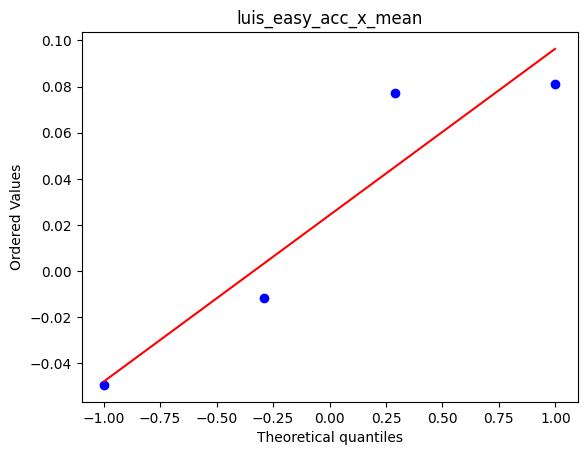

ShapiroResult(statistic=0.8556482688359426, pvalue=0.2449824531312778)
Is normally distributed:  True


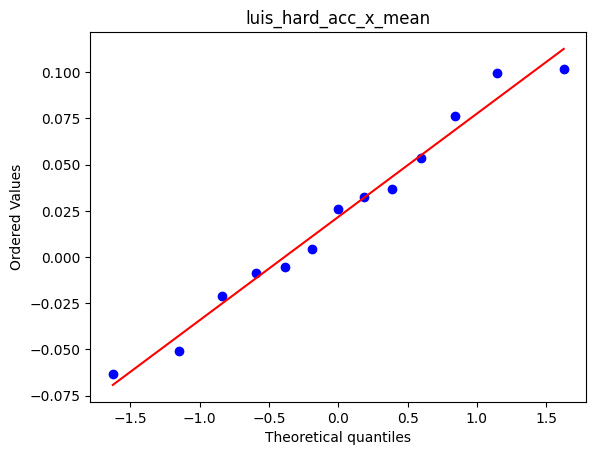

ShapiroResult(statistic=0.9644371729675932, pvalue=0.8202691162747546)
Is normally distributed:  True


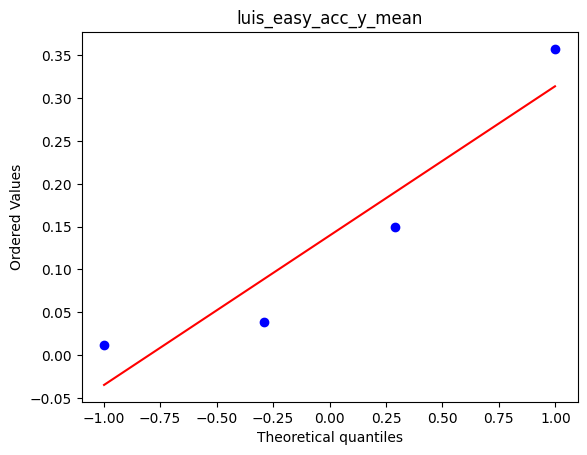

ShapiroResult(statistic=0.8860249440758716, pvalue=0.3650072001835676)
Is normally distributed:  True


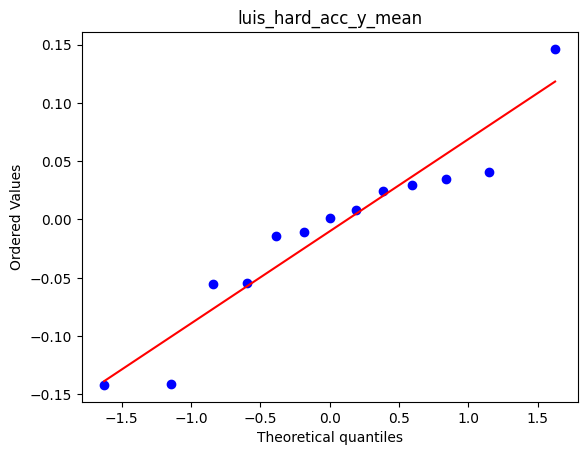

ShapiroResult(statistic=0.9271834397433399, pvalue=0.3129529084831877)
Is normally distributed:  True


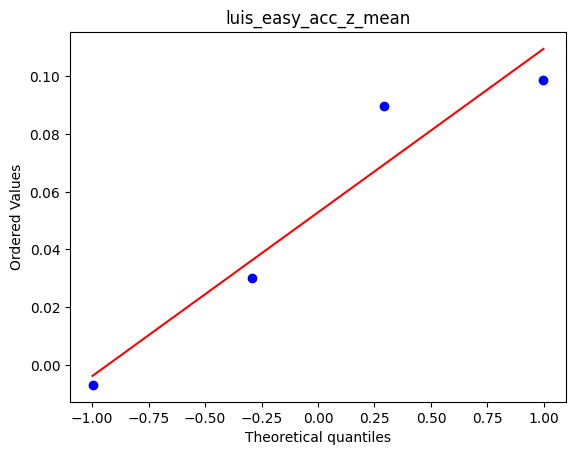

ShapiroResult(statistic=0.9011898760846782, pvalue=0.43699350247098945)
Is normally distributed:  True


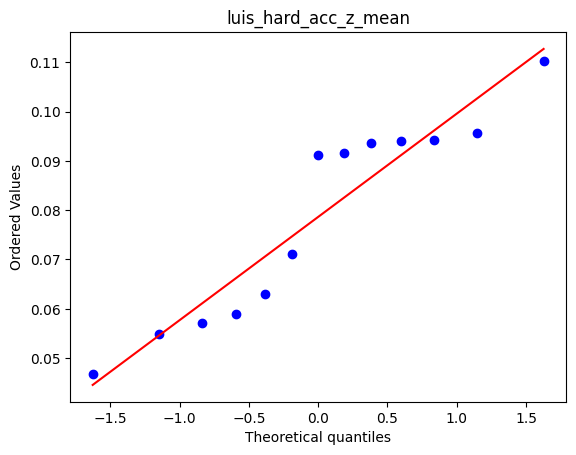

ShapiroResult(statistic=0.8889502011055369, pvalue=0.09437995446226004)
Is normally distributed:  True


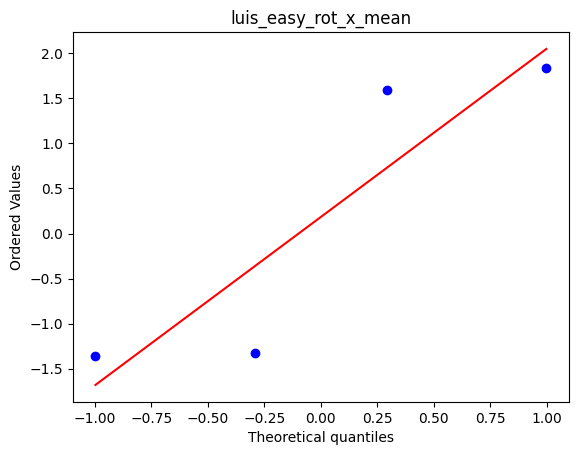

ShapiroResult(statistic=0.7662583325629782, pvalue=0.05419555179944742)
Is normally distributed:  True


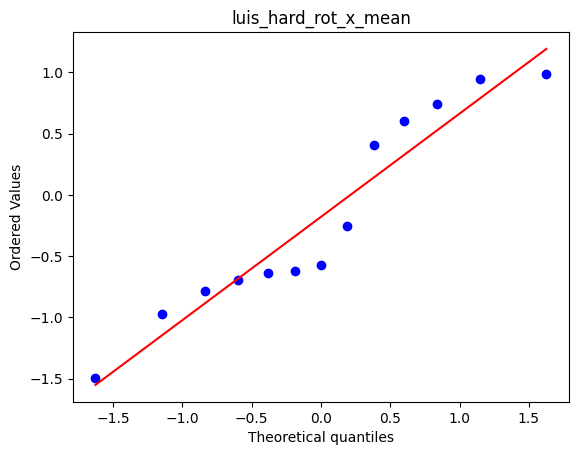

ShapiroResult(statistic=0.9080457919468611, pvalue=0.17242637491767215)
Is normally distributed:  True


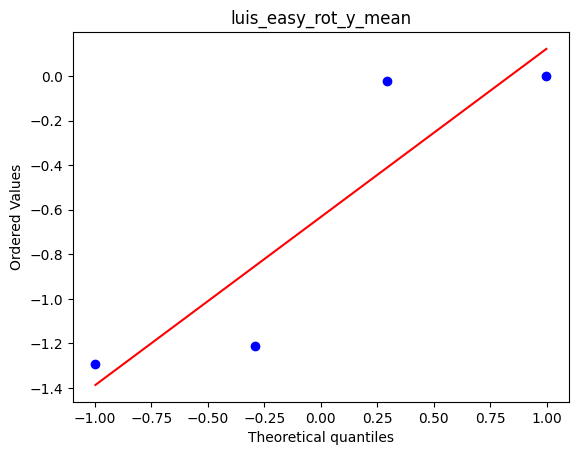

ShapiroResult(statistic=0.7634726359124322, pvalue=0.05122278582002961)
Is normally distributed:  True


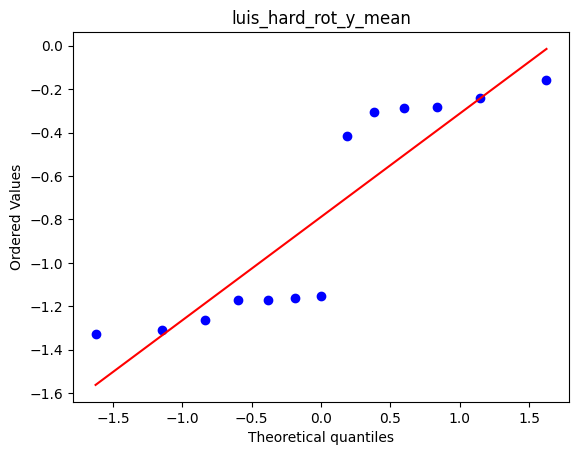

ShapiroResult(statistic=0.7735444450453075, pvalue=0.003362465753108327)
Is normally distributed:  False


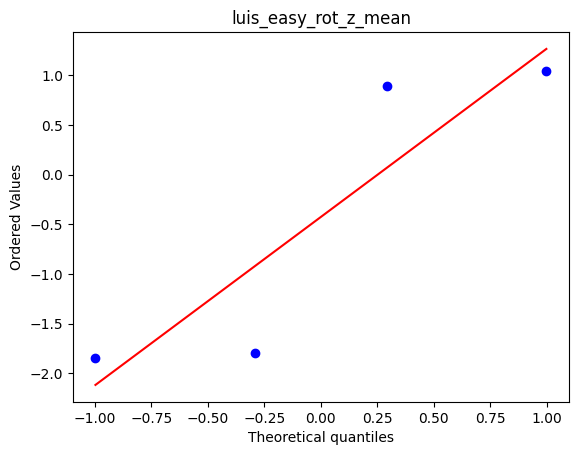

ShapiroResult(statistic=0.7587014805675418, pvalue=0.04643415153484802)
Is normally distributed:  False


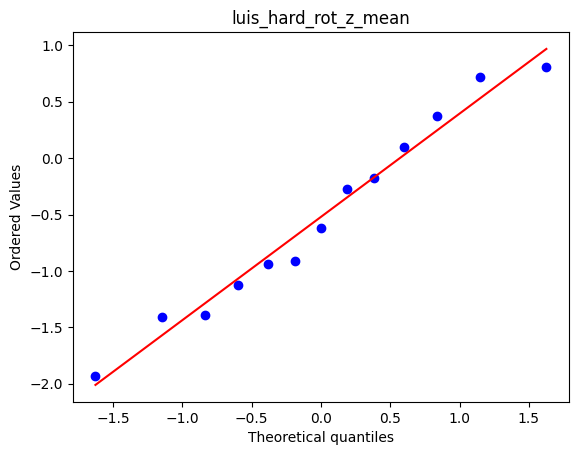

ShapiroResult(statistic=0.9630334973410868, pvalue=0.799701798504608)
Is normally distributed:  True


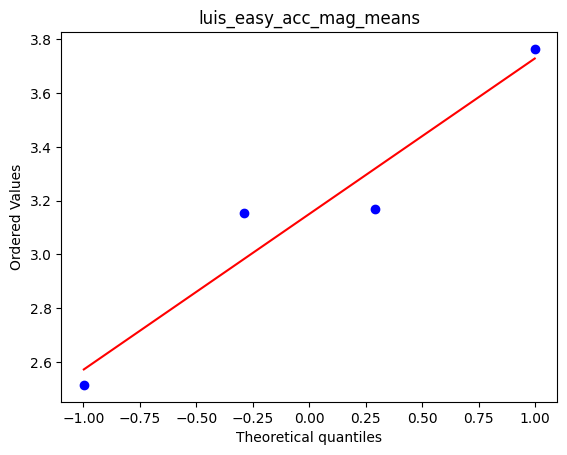

ShapiroResult(statistic=0.9503196110186075, pvalue=0.7181130795465839)
Is normally distributed:  True


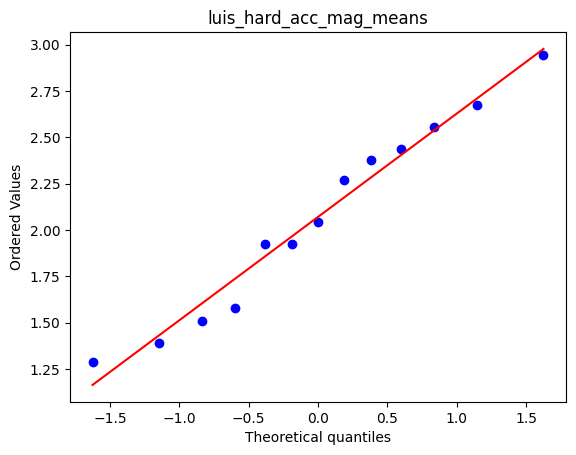

ShapiroResult(statistic=0.9595890825994274, pvalue=0.7473057234370473)
Is normally distributed:  True


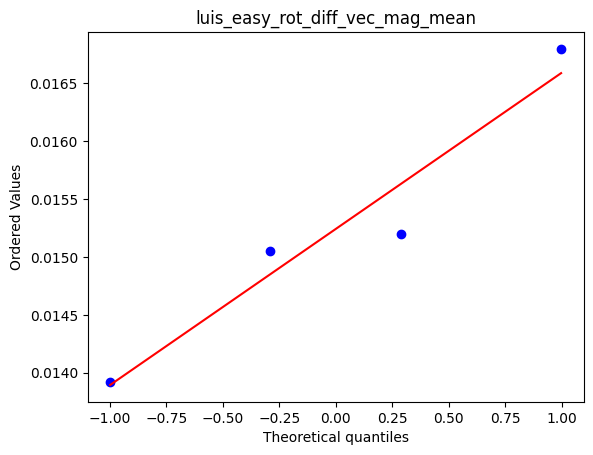

ShapiroResult(statistic=0.9538284880332646, pvalue=0.7400948043626343)
Is normally distributed:  True


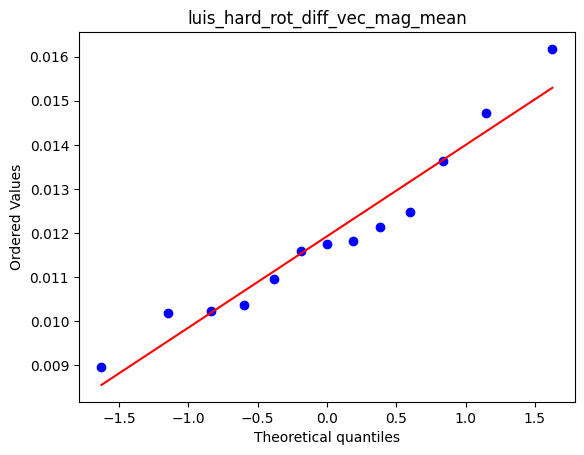

ShapiroResult(statistic=0.9480931018018834, pvalue=0.5696963532991399)
Is normally distributed:  True



Features are normally distributed:
luis_easy_acc_x_mean True
luis_hard_acc_x_mean True
luis_easy_acc_y_mean True
luis_hard_acc_y_mean True
luis_easy_acc_z_mean True
luis_hard_acc_z_mean True
luis_easy_rot_x_mean True
luis_hard_rot_x_mean True
luis_easy_rot_y_mean True
luis_hard_rot_y_mean False
luis_easy_rot_z_mean False
luis_hard_rot_z_mean True
luis_easy_acc_mag_means True
luis_hard_acc_mag_means True
luis_easy_rot_diff_vec_mag_mean True
luis_hard_rot_diff_vec_mag_mean True


In [55]:
alpha = 0.05
features = ["luis_easy_acc_x_mean", "luis_hard_acc_x_mean", "luis_easy_acc_y_mean", "luis_hard_acc_y_mean", "luis_easy_acc_z_mean", "luis_hard_acc_z_mean", "luis_easy_rot_x_mean", "luis_hard_rot_x_mean", "luis_easy_rot_y_mean", "luis_hard_rot_y_mean", "luis_easy_rot_z_mean", "luis_hard_rot_z_mean", "luis_easy_acc_mag_means", "luis_hard_acc_mag_means", "luis_easy_rot_diff_vec_mag_mean", "luis_hard_rot_diff_vec_mag_mean"]

features_normal_distributed = {}

for feature_name in features:
    feature = eval(feature_name)
    stats.probplot(feature, dist="norm", plot=plt)
    plt.title(feature_name)
    plt.show()

    shapiro_test = stats.shapiro(feature)
    print(shapiro_test)
    print("Is normally distributed: ", shapiro_test[1] > alpha)

    features_normal_distributed[feature_name] = shapiro_test[1] > alpha

print("\n\n")
print("Features are normally distributed:")
for key, value in features_normal_distributed.items():
    print(key, value)


In [56]:
# Acceleration X, Y, Z mean – t-test

acc_x_mean_test = stats.ttest_ind(luis_easy_acc_x_mean, luis_hard_acc_x_mean)
acc_y_mean_test = stats.ttest_ind(luis_easy_acc_y_mean, luis_hard_acc_y_mean)
acc_z_mean_test = stats.ttest_ind(luis_easy_acc_z_mean, luis_hard_acc_z_mean)

print("Acceleration X mean test: ", acc_x_mean_test)
print("Acceleration Y mean test: ", acc_y_mean_test)
print("Acceleration Z mean test: ", acc_z_mean_test)

# Rotation X, Y, mean – t-test; Rotation Z mean – Mann-Whitney U test

rot_x_mean_test = stats.ttest_ind(luis_easy_rot_x_mean, luis_hard_rot_x_mean)
rot_y_mean_test = stats.ttest_ind(luis_easy_rot_y_mean, luis_hard_rot_y_mean)
rot_z_mean_test = stats.mannwhitneyu(luis_easy_rot_z_mean, luis_hard_rot_z_mean)

print("Rotation X mean test: ", rot_x_mean_test)
print("Rotation Y mean test: ", rot_y_mean_test)
print("Rotation Z mean test: ", rot_z_mean_test)

# Acceleration magnitude mean – t-test

acc_mag_mean_test = stats.ttest_ind(luis_easy_acc_mag_means, luis_hard_acc_mag_means)
print("Acceleration magnitude mean test: ", acc_mag_mean_test)

# Rotation vector magnitude mean – t-test

rot_diff_vec_mag_mean_test = stats.ttest_ind(luis_easy_rot_diff_vec_mag_mean, luis_hard_rot_diff_vec_mag_mean)
print("Rotation vector magnitude mean test: ", rot_diff_vec_mag_mean_test)


Acceleration X mean test:  TtestResult(statistic=0.0814198162013477, pvalue=0.936184561970687, df=15.0)
Acceleration Y mean test:  TtestResult(statistic=2.6619352936813176, pvalue=0.01776246368257167, df=15.0)
Acceleration Z mean test:  TtestResult(statistic=-1.5545199175180056, pvalue=0.1409028264568947, df=15.0)
Rotation X mean test:  TtestResult(statistic=0.5919053364670462, pvalue=0.562729887663888, df=15.0)
Rotation Y mean test:  TtestResult(statistic=0.500689716224268, pvalue=0.6238560131239517, df=15.0)
Rotation Z mean test:  MannwhitneyuResult(statistic=28.0, pvalue=0.8705882352941177)
Acceleration magnitude mean test:  TtestResult(statistic=3.6134905807384445, pvalue=0.0025540220986274725, df=15.0)
Rotation vector magnitude mean test:  TtestResult(statistic=3.128461390280938, pvalue=0.0069038064837356515, df=15.0)
